The computation of expectation values for molecular operators is a fundamental aspect of quantum computing, especially in its applications to molecular simulations. This process is essential for evaluating key molecular properties such as energy levels, bond lengths, and reactivity, which are critical for understanding chemical behavior. At its core, expectation value computation bridges the principles of quantum mechanics with the computational capabilities of quantum hardware, offering insights that are unattainable through classical methods.

In molecular simulations, the electronic structure problem is a primary focus. This involves solving the Schrödinger equation to determine a molecule's energy and properties. However, the complexity of this equation grows exponentially with the number of electrons and orbitals, making exact solutions computationally infeasible for most molecules. Quantum computing provides a way to tackle this complexity using algorithms such as the Variational Quantum Eigensolver (VQE) and Quantum Phase Estimation (QPE). These approaches allow for approximating solutions by leveraging the unique properties of quantum systems.

The expectation value, a concept rooted in quantum mechanics, represents the average outcome of measuring an observable in a given quantum state. Mathematically, it is expressed as the inner product of a quantum state, denoted as $ |\psi\rangle $, and the observable operator, $\hat{O}$. This relationship can be written as $ \langle \hat{O} \rangle = \langle \psi | \hat{O} | \psi \rangle $. In quantum chemistry, the observable often corresponds to the molecular Hamiltonian, which encapsulates the system's energy and interactions.

On quantum hardware, preparing the quantum state $|\psi\rangle $ is achieved through parameterized quantum circuits, such as those employed in VQE. The observable operator, which may represent a molecular property like energy, is typically decomposed into a sum of simpler terms known as Pauli operators. For example, the molecular Hamiltonian can be expressed as a weighted sum of Pauli terms: $ \hat{H}$ = $sum_{i} c_i P_i $ where $ P_i$ are Pauli operators and $ c_i $ are coefficients derived from molecular integrals. This decomposition is crucial, as it allows the quantum hardware to efficiently compute the expectation value for each term.

The expectation value of the Hamiltonian is obtained by summing the contributions from all Pauli terms, weighted by their respective coefficients. This process involves preparing the quantum state on hardware, measuring it in the appropriate basis for each Pauli term, and aggregating the results. This hybrid quantum-classical approach is one of the hallmarks of near-term quantum algorithms, enabling molecular simulations that were previously out of reach.

The practical applications of this process are profound. By computing the expectation values of the Hamiltonian, researchers can approximate the ground state energy of molecules, which is a critical parameter for predicting chemical stability and reactivity. Additionally, varying the nuclear positions of atoms within the molecule and recomputing expectation values allows for the determination of equilibrium geometries and bond lengths. Beyond energy, expectation values of other operators can provide insights into magnetic, optical, and electronic properties, further broadening the scope of quantum simulations.

Despite its potential, the computation of expectation values faces challenges. Quantum noise, hardware limitations, and decoherence introduce errors that can affect the accuracy of results. To address these issues, techniques such as error mitigation, circuit optimization, and efficient operator decomposition are actively being developed. These advancements are crucial for scaling quantum simulations to handle more complex molecules and larger systems.

The importance of expectation value computation extends far beyond academic curiosity. It is a key enabler for quantum chemistry, promising advancements in drug discovery, sustainable energy solutions, and the design of novel materials. As quantum hardware continues to improve, the ability to perform these computations will revolutionize our understanding of molecular systems, making quantum computing an indispensable tool in chemistry and beyond.

In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp, Statevector, partial_trace
from qiskit.primitives import Estimator
import matplotlib.pyplot as plt

from qiskit.visualization import (
    plot_bloch_multivector,
    plot_state_qsphere,
    plot_state_city,
    plot_state_hinton,
)

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define a simple molecular Hamiltonian as a sum of Pauli operators
pauli_terms = {
    "II": -1.052373245772859,
    "IZ": 0.39793742484318045,
    "ZI": -0.39793742484318045,
    "ZZ": -0.01128010425623538,
    "XX": 0.18093119978423156,
}

In [3]:
# Create SparsePauliOp representation of the Hamiltonian
pauli_op_list = [(pauli_str, coef) for pauli_str, coef in pauli_terms.items()]
hamiltonian = SparsePauliOp.from_list(pauli_op_list)

In [4]:
# Define a parameterized quantum circuit (ansatz) for the molecular state
def create_ansatz(theta1, theta2):
    circuit = QuantumCircuit(2)
    circuit.rx(theta1, 0)
    circuit.ry(theta2, 1)
    circuit.cx(0, 1)
    return circuit

In [5]:
# Initialize parameters for the ansatz
theta1, theta2 = np.random.random(), np.random.random()
# Generate the quantum circuit
ansatz = create_ansatz(theta1, theta2)

Quantum Circuit (Ansatz):


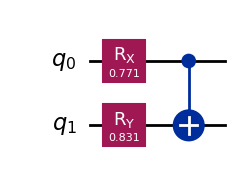

In [6]:
# Visualize the quantum circuit (MPL format)
print("Quantum Circuit (Ansatz):")
ansatz.draw("mpl")
plt.show()

In [7]:
# Transpile and simulate the quantum circuit to get the statevector
simulated_circuit = transpile(ansatz)
state = Statevector.from_instruction(simulated_circuit)

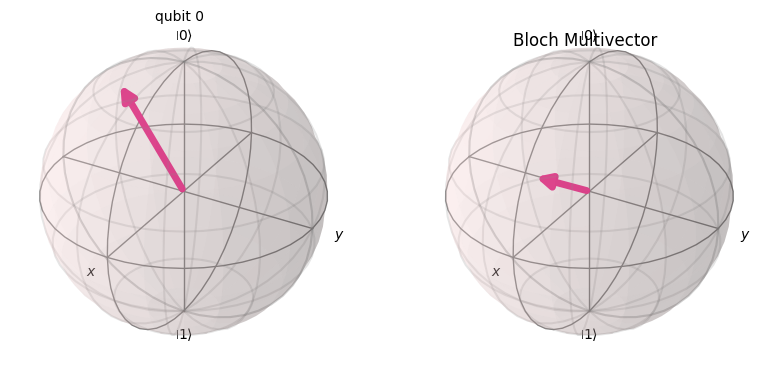

In [8]:
# Visualization: Bloch multivector
plot_bloch_multivector(state)
plt.title("Bloch Multivector")
plt.show()

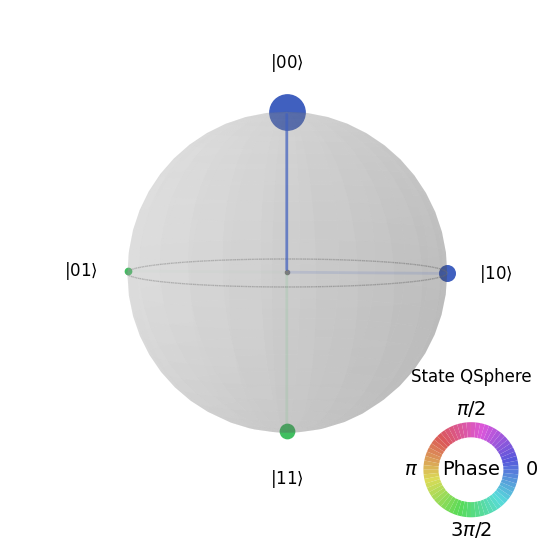

In [9]:
# Visualization: QSphere
plot_state_qsphere(state)
plt.title("State QSphere")
plt.show()

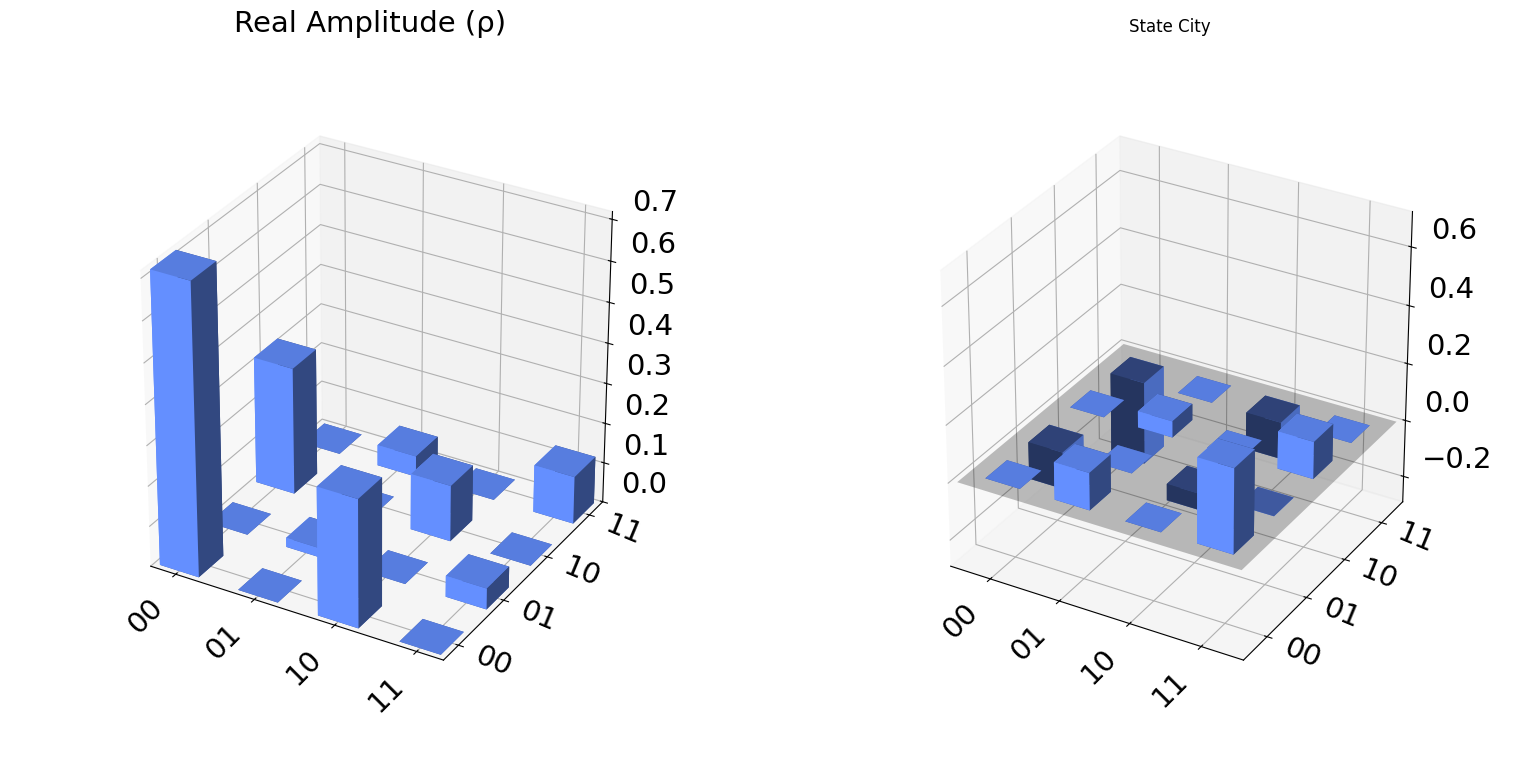

In [10]:
# Visualization: State City plot
plot_state_city(state)
plt.title("State City")
plt.show()

In [11]:
# # Visualization: Partial Trace plot (reduced density matrix for one qubit)
# rho = partial_trace(state, [0])
# plot_state_hinton(rho)
# plt.title("Partial Trace (Qubit 0)")
# plt.show()

In [12]:
# Instantiate the Estimator for expectation value computation
estimator = Estimator()

In [13]:
# Compute the expectation value of the Hamiltonian
expectation_value = estimator.run(circuits=[ansatz], observables=[hamiltonian]).result().values[0]
print(f"\nExpectation Value of the Hamiltonian: {expectation_value:.6f}")


Expectation Value of the Hamiltonian: -0.966932


In [14]:
# Visualization: Convergence of the expectation value with different parameters
theta1_values = np.linspace(0, 2 * np.pi, 50)
theta2_values = np.linspace(0, 2 * np.pi, 50)
expectation_values = []
for t1, t2 in zip(theta1_values, theta2_values):
    circuit = create_ansatz(t1, t2)
    ev = estimator.run(circuits=[circuit], observables=[hamiltonian]).result().values[0]
    expectation_values.append(ev)

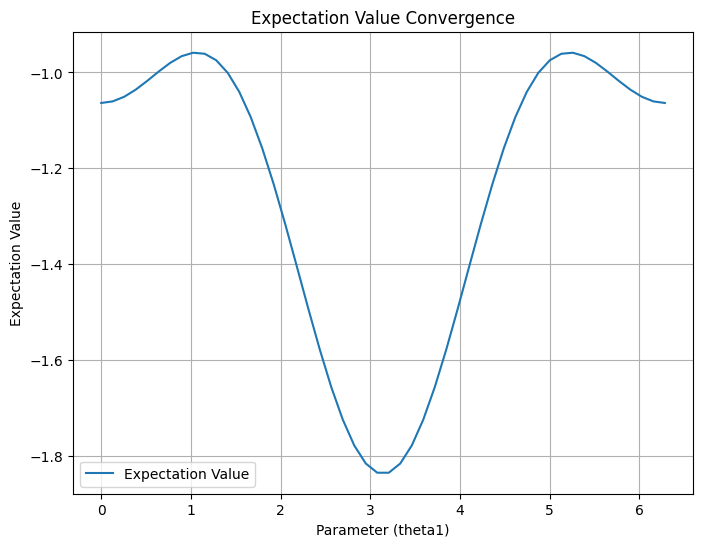

In [15]:
# Plotting the expectation values as a function of parameters
plt.figure(figsize=(8, 6))
plt.plot(theta1_values, expectation_values, label="Expectation Value")
plt.xlabel("Parameter (theta1)")
plt.ylabel("Expectation Value")
plt.title("Expectation Value Convergence")
plt.legend()
plt.grid()
plt.show()
